In [138]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.ticker import FuncFormatter
sns.set_style('darkgrid')

In [139]:
path = 'filtro_passa_alta/'

### Filtro Passa Alta

Um **filtro passa alta** é um tipo de filtro eletrônico que permite a passagem de sinais com uma frequência mais alta que uma determinada frequência de corte e atenua (reduz) os sinais de frequência mais baixa. Este tipo de filtro é usado em várias aplicações, como áudio, comunicação, e processamento de sinais.

#### Conceitos Principais

- **Frequência de Corte (fc)**: A frequência na qual a resposta do filtro é reduzida a um valor específico (normalmente 3 dB abaixo do valor de passagem máxima).
- **Atenuação**: Redução da amplitude do sinal em frequências abaixo da frequência de corte.
- **Passagem**: Frequências acima da frequência de corte passam pelo filtro com pouca ou nenhuma atenuação.
- **Resposta em Frequência**: Gráfico que mostra como a amplitude do sinal varia com a frequência.

#### Fórmula do Filtro Passa Alta RC

Para um filtro passa alta simples usando um resistor (R) e um capacitor (C), a frequência de corte é dada por:

$v_{{corte}} = \frac{1}{2 \pi RC}$

In [140]:
def ten_pow(n): return 10 ** n

In [141]:
R = 10.2 # Ohms
R_L = 0.9 # Ohms
L = 1.237 # mH
v_corte = R / (2 * m.pi * L)

In [142]:
v = np.array([1.502, 1.416, 1.335, 1.261, 1.175, 1.089, 1.005, 0.9200, 0.8400, 0.7573, 0.6627, 0.6000, 0.5216, 0.4464, 0.3605, 0.2900, 0.2095, 0.1268, 0.08065, 0.05780]) # kHz
delta_t_over_T = np.array([0.1392, 0.1180, 0.1164, 0.1204, 0.1412, 0.1194, 0.1608, 0.1289, 0.1684, 0.1818, 0.1667, 0.1736, 0.1983, 0.1920, 0.1871, 0.1795, 0.1838, 0.1469, 0.1129, 0.1160])
v0 = np.array([4.56, 4.40, 4.40, 4.24, 4.12, 3.76, 3.74, 3.16, 3.48, 3.36, 3.28, 3.08, 3.04, 3.44, 3.28, 3.24, 3.20, 3.20, 3.52, 2.40]) * ten_pow(3) # mV
v_L0 = np.array([3.44, 3.28, 3.16, 3.00, 2.80, 2.44, 2.21, 2.08, 1.92, 1.76, 1.56, 1.36, 1.20, 1.20, 940, 800, 600, 392, 344, 176]) # mV
v_L0[:-6] = v_L0[:-6] * ten_pow(3)

In [143]:
df_1 = pd.DataFrame(
    {
        'v' : v,
        'delta_t_over_T' : delta_t_over_T,
        'v0' : v0,
        'v_L0' : v_L0
        
    }
)

In [144]:
v = np.array([1.590, 1.670, 1.750, 1.820, 1.908, 1.986, 2.054, 2.135, 2.224, 2.304, 2.390, 2.480, 2.546, 2.636, 2.723, 2.804, 2.880, 2.969, 3.069, 3.120]) # kHz
delta_t_over_T = np.array([0.1018, 0.08080, 0.08451, 0.09534, 0.09939, 0.09497, 0.08183, 0.08518, 0.07986, 0.06449, 0.07667, 0.06965, 0.08159, 0.07920, 0.07081, 0.07307, 0.05767, 0.05181, 0.05445, 0.05628])
v0 = np.array([1.84, 2.24, 2.32, 2.40, 2.44, 2.48, 2.56, 2.60, 2.66, 2.72, 2.80, 2.88, 2.92, 3.00, 3.08, 3.16, 3.44, 3.56, 3.56, 3.76]) * ten_pow(3) # mV
v_L0 = np.array([1.48, 1.80, 1.88, 1.96, 2.04, 2.04, 2.12, 2.20, 2.26, 2.36, 2.44, 2.56, 2.60, 2.68, 2.72, 2.76, 3.16, 3.16, 3.24, 3.86]) * ten_pow(3) # mV

In [145]:
df_2 = pd.DataFrame(
    {
        'v' : v,
        'delta_t_over_T' : delta_t_over_T,
        'v0' : v0,
        'v_L0' : v_L0
        
    }
)

In [146]:
df_2

,v,delta_t_over_T,v0,v_L0
0,1.590,0.10180,1840.0,1480.0
1,1.670,0.08080,2240.0,1800.0
2,1.750,0.08451,2320.0,1880.0
3,1.820,0.09534,2400.0,1960.0
4,1.908,0.09939,2440.0,2040.0
5,1.986,0.09497,2480.0,2040.0
6,2.054,0.08183,2560.0,2120.0
7,2.135,0.08518,2600.0,2200.0
8,2.224,0.07986,2660.0,2260.0
9,2.304,0.06449,2720.0,2360.0


In [147]:
df_3 =  pd.concat([df_1, df_2], axis=0)
df_3.sort_values(by='v', inplace=True)
df_3.reset_index(drop=True, inplace=True)

df_3['x'] = (df_3['v'] / v_corte)
df_3['v_Lred'] = df_3['v_L0'] / df_3['v0']
df_3['tg_alpha'] = (np.tan(2 * np.pi * df_3['delta_t_over_T'])) ** -1
df_3

,v,delta_t_over_T,v0,v_L0,x,v_Lred,tg_alpha
0,0.05780,0.11600,2400.0,176.0,0.044043,0.073333,1.120012
1,0.08065,0.11290,3520.0,344.0,0.061455,0.097727,1.164908
2,0.12680,0.14690,3200.0,392.0,0.096620,0.122500,0.756733
3,0.20950,0.18380,3200.0,600.0,0.159637,0.187500,0.441720
4,0.29000,0.17950,3240.0,800.0,0.220977,0.246914,0.474407
5,0.36050,0.18710,3280.0,940.0,0.274697,0.286585,0.417161
6,0.44640,0.19200,3440.0,1200.0,0.340152,0.348837,0.381463
7,0.52160,0.19830,3040.0,1200.0,0.397454,0.394737,0.336770
8,0.60000,0.17360,3080.0,1360.0,0.457194,0.441558,0.520656
9,0.66270,0.16670,3280.0,1560.0,0.504971,0.475610,0.577071


In [148]:
df_3.to_excel(path + 'table.xlsx')

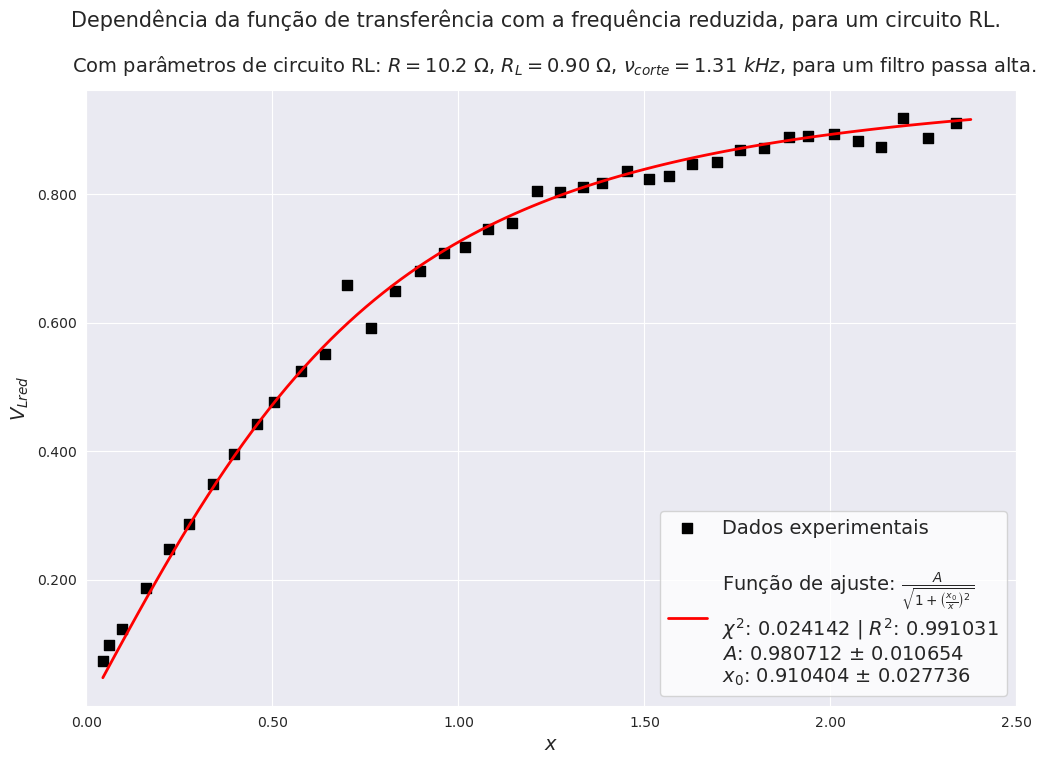

In [149]:
# Função de ajuste para V_cred
def v_Lred_fit(x, A, x0):
    return A / np.sqrt(1 + (x0 / x) ** 2)

# Ajuste para V_Lred
params_v_Lred, pcov_v_Lred = curve_fit(v_Lred_fit, df_3['x'], df_3['v_Lred'], p0=[1, 1])
A_fit, x0_fit = params_v_Lred
A_fit_err, x0_fit_err = np.sqrt(np.diag(pcov_v_Lred))

# Curva ajustada
x_values = np.linspace(min(df_3['x']), max(df_3['x']), 100)
v_Lred_fit_curve = v_Lred_fit(x_values, A_fit, x0_fit)

# Cálculo do chi-square e do R-squared
residuals_v_Lred = df_3['v_Lred'] - v_Lred_fit(df_3['x'], *params_v_Lred)
chi_square_v_Lred = np.sum(residuals_v_Lred ** 2)
r_squared_v_Lred = 1 - (np.sum(residuals_v_Lred ** 2) / np.sum((df_3['v_Lred'] - np.mean(df_3['v_Lred'])) ** 2))

# Formatar strings para inclusão na legenda
legend_title = '\n' + r'Função de ajuste: $\frac{A}{\sqrt{1 + \left(\frac{x_0}{x}\right)^2}}$'
legend_chi_r = r'$\chi^2$: {:.6f} | $R^2$: {:.6f}'.format(chi_square_v_Lred, r_squared_v_Lred)
legend_A = r'$A$: {:.6f} $\pm$ {:.6f}'.format(A_fit, A_fit_err)
legend_x0 = r'$x_0$: {:.6f} $\pm$ {:.6f}'.format(x0_fit, x0_fit_err)

legend_text = '\n'.join([legend_title, legend_chi_r, legend_A, legend_x0])

def format_x_ticks(x, pos):
    return f'{x:.2f}'

def format_ticks(y, pos):
    """
    Formata o número com 4 algarismos significativos, preservando zeros à direita.

    Parâmetros:
    - y: valor do número a ser formatado.
    - pos: posição do marcador (não usado nesta função).

    Retorna:
    - str: o número formatado com 4 algarismos significativos.
    """
    if y == 0:
        return '0.000'
    else:
        # Obter o número com 4 dígitos significativos
        formatted = f'{y:.4g}'
        
        # Se a notação científica for usada, converte para float novamente
        if 'e' in formatted or 'E' in formatted:
            formatted = f'{float(formatted):.4f}'
        else:
            # Adicionar zeros à direita para garantir 4 dígitos significativos
            if '.' in formatted:
                integer_part, decimal_part = formatted.split('.')
                while len(decimal_part) < 3:
                    decimal_part += '0'
                formatted = f'{integer_part}.{decimal_part}'
            else:
                formatted += '.000'

        return formatted

# Plot dos dados e do ajuste
plt.figure(figsize=(12, 8))
plt.suptitle(r'Dependência da função de transferência com a frequência reduzida, para um circuito RL.', fontsize=15)
plt.title(fr' Com parâmetros de circuito RL: $R = {R:.1f}\ \Omega$, $R_L = {R_L:.2f}\ \Omega$, $\nu_{{corte}} = {v_corte:.2f}\ kHz$, para um filtro passa alta.', fontsize=14, y=1.015)
plt.scatter(df_3['x'][:-1], df_3['v_Lred'][:-1], marker='s', s=50, color='black', label='Dados experimentais')
plt.plot(x_values, v_Lred_fit_curve, color='red', linestyle='-', label=f'{legend_text}', lw=2)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$V_{{Lred}}$', fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_ticks))
plt.xlim(0, 2.5)
plt.legend(facecolor='white', fontsize=14, loc='best')
plt.savefig(path + 'v_Lred_versus_x_ajuste.pdf')
plt.show()

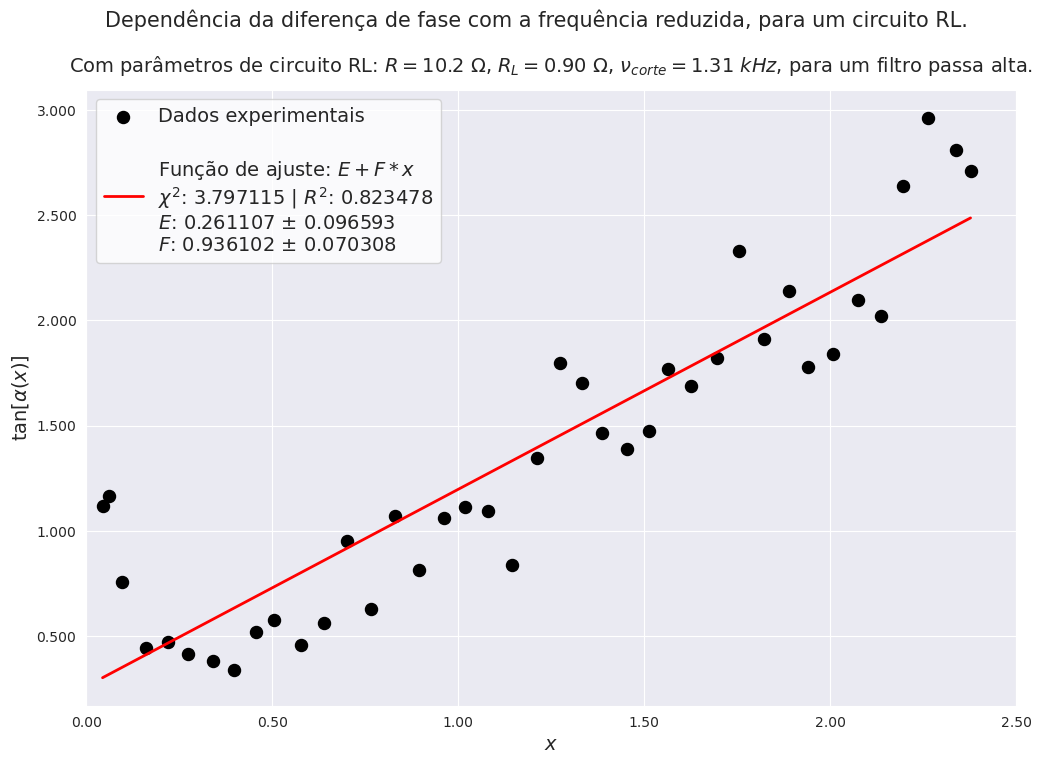

In [150]:
# Função de ajuste linear
def linear_fit(x, E, F):
    return E + F * x

# Ajuste linear para tg(alpha)
params_tg, pcov_tg = curve_fit(linear_fit, df_3['x'], df_3['tg_alpha'])
E_fit, F_fit = params_tg
E_fit_err, F_fit_err = np.sqrt(np.diag(pcov_tg))

# Curva ajustada
x_values = np.linspace(min(df_3['x']), max(df_3['x']), 100)
tg_alpha_fit = linear_fit(x_values, E_fit, F_fit)

# Cálculo do chi-square e do R-squared
residuals_tg = df_3['tg_alpha'] - linear_fit(df_3['x'], *params_tg)
chi_square_tg = np.sum(residuals_tg ** 2)
r_squared_tg = 1 - (np.sum(residuals_tg ** 2) / np.sum((df_3['tg_alpha'] - np.mean(df_3['tg_alpha'])) ** 2))

# Formatar strings para inclusão na legenda
legend_title = '\n' + r'Função de ajuste: $E + F*x$'
legend_chi_r = r'$\chi^2$: {:.6f} | $R^2$: {:.6f}'.format(chi_square_tg, r_squared_tg)
legend_E = r'$E$: {:.6f} $\pm$ {:.6f}'.format(E_fit, E_fit_err)
legend_F = r'$F$: {:.6f} $\pm$ {:.6f}'.format(F_fit, F_fit_err)

legend_text = '\n'.join([legend_title, legend_chi_r, legend_E, legend_F])

def format_x_ticks(x, pos):
    return f'{x:.2f}'

def format_ticks(y, pos):
    """
    Formata o número com 4 algarismos significativos, preservando zeros à direita.

    Parâmetros:
    - y: valor do número a ser formatado.
    - pos: posição do marcador (não usado nesta função).

    Retorna:
    - str: o número formatado com 4 algarismos significativos.
    """
    if y == 0:
        return '0.000'
    else:
        # Obter o número com 4 dígitos significativos
        formatted = f'{y:.4g}'
        
        # Se a notação científica for usada, converte para float novamente
        if 'e' in formatted or 'E' in formatted:
            formatted = f'{float(formatted):.4f}'
        else:
            # Adicionar zeros à direita para garantir 4 dígitos significativos
            if '.' in formatted:
                integer_part, decimal_part = formatted.split('.')
                while len(decimal_part) < 3:
                    decimal_part += '0'
                formatted = f'{integer_part}.{decimal_part}'
            else:
                formatted += '.000'

        return formatted

# Plot dos dados e do ajuste
plt.figure(figsize=(12, 8))
plt.suptitle(r'Dependência da diferença de fase com a frequência reduzida, para um circuito RL.', fontsize=15)
plt.title(fr'Com parâmetros de circuito RL: $R = {R:.1f}\ \Omega$, $R_L = {R_L:.2f}\ \Omega$, $\nu_{{corte}} = {v_corte:.2f}\ kHz$, para um filtro passa alta.', fontsize=14, y=1.015)
plt.scatter(df_3['x'], df_3['tg_alpha'], marker='o', s=75, color='black', label='Dados experimentais')
plt.plot(x_values, tg_alpha_fit, color='red', linestyle='-', label=f'{legend_text}', lw=2)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$\tan [\alpha (x)]$', fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_ticks))
plt.xlim(0, 2.5)
plt.legend(facecolor='white', fontsize=14, loc='best')

plt.savefig(path + 'tg_alpha_vs_x_ajuste.pdf')
plt.show()